In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [29]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *


In [3]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

## Model 1 - Ambiguity Presence

### All trials

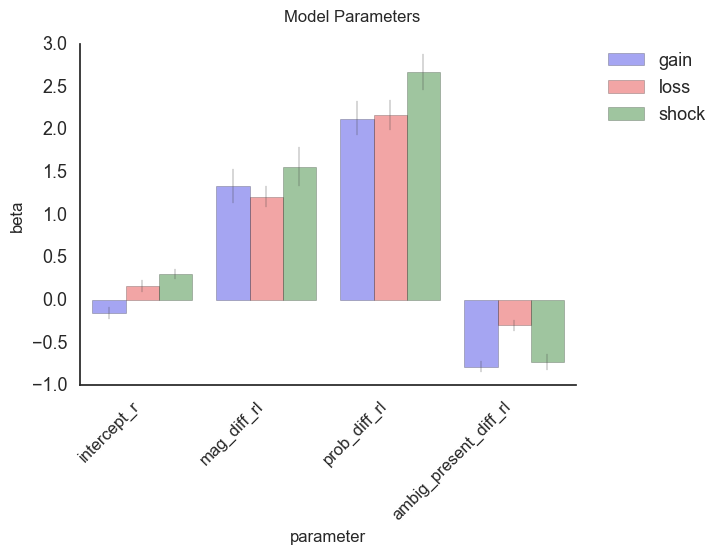

In [8]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'all')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
f = plot_params_rl(model_param_df, stripplot=False)

In [9]:
model_param_df_present_all = model_param_df

### First trials¶

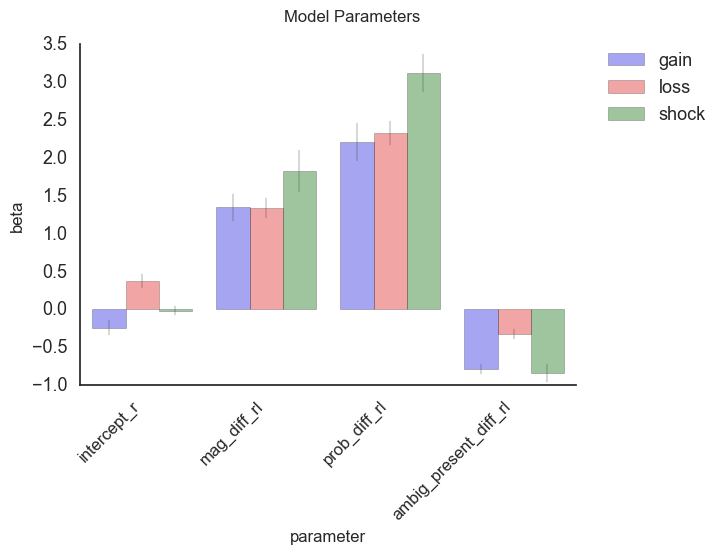

In [10]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'firstTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [11]:
model_param_df_present_first = model_param_df

### Late Trials

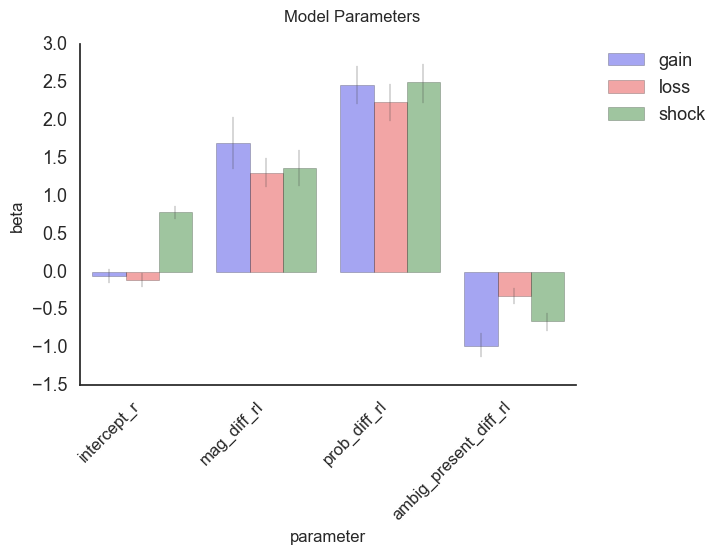

In [12]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_present', which_trial = 'lateTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [13]:
model_param_df_present_late = model_param_df

## Model 2 - Ambiguity Level

### All trials

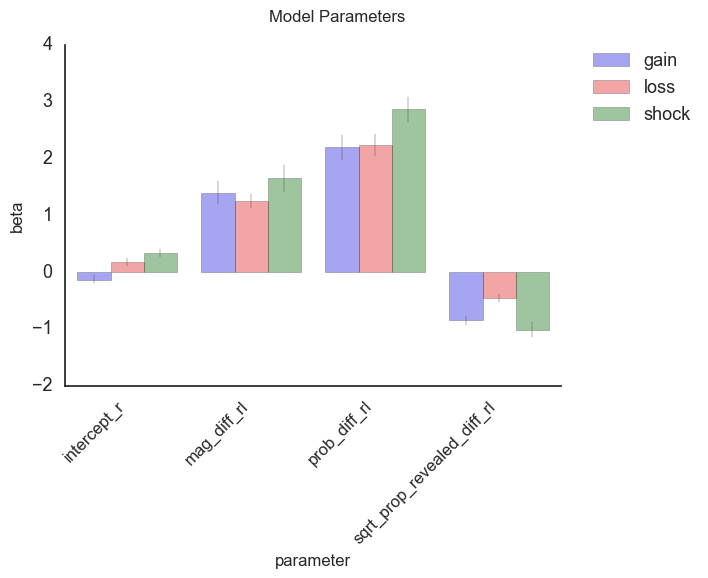

In [14]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [15]:
model_param_df_level_all = model_param_df

### First Trials

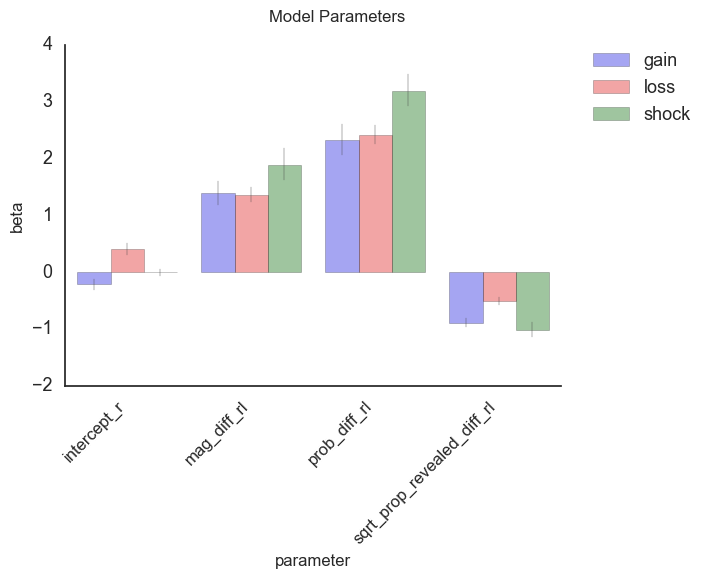

In [16]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'firstTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [17]:
model_param_df_level_first = model_param_df

### Late Trials

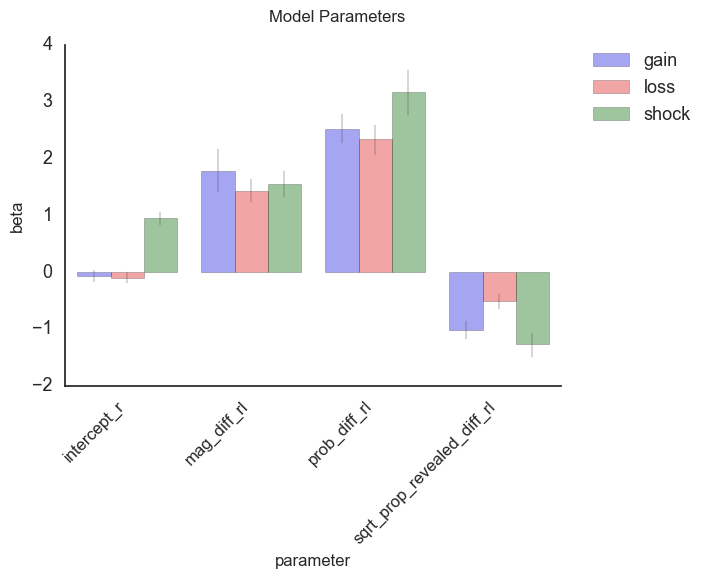

In [18]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'lateTrials')
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
fig = plot_params_rl(model_param_df, stripplot=False)

In [19]:
model_param_df_level_late = model_param_df

## Correlations between early and late trial parameters (AmbiLevel)

In [20]:
triplet_intercept_first = triplet_rl(model_param_df_level_first, 'intercept_r')
triplet_magdiff_first = triplet_rl(model_param_df_level_first, 'mag_diff_rl')
triplet_probdiff_first = triplet_rl(model_param_df_level_first, 'prob_diff_rl')
triplet_ambiguityLevel_first = triplet_rl(model_param_df_level_first, 'sqrt_prop_revealed_diff_rl')

In [21]:
triplet_intercept_late = triplet_rl(model_param_df_level_late, 'intercept_r')
triplet_magdiff_late = triplet_rl(model_param_df_level_late, 'mag_diff_rl')
triplet_probdiff_late = triplet_rl(model_param_df_level_late, 'prob_diff_rl')
triplet_ambiguityLevel_late = triplet_rl(model_param_df_level_late, 'sqrt_prop_revealed_diff_rl')

In [22]:
triplet_intercept_first = triplet_intercept_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_magdiff_first = triplet_magdiff_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_probdiff_first = triplet_probdiff_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})
triplet_ambiguityLevel_first = triplet_ambiguityLevel_first.rename(columns={"gain": "gain123", "se_gain": "se_gain123", "loss": "loss123", "se_loss": "se_loss123", "shock": "shock123", "se_shock": "se_shock123"})


In [23]:
triplet_intercept_late = triplet_intercept_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_magdiff_late = triplet_magdiff_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_probdiff_late = triplet_probdiff_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})
triplet_ambiguityLevel_late = triplet_ambiguityLevel_late.rename(columns={"gain": "gain45", "se_gain": "se_gain45", "loss": "loss45", "se_loss": "se_loss45", "shock": "shock45", "se_shock": "se_shock45"})


In [24]:
triplet_intercept = triplet_intercept_first.merge(triplet_intercept_late, 'left')
triplet_magdiff = triplet_magdiff_first.merge(triplet_magdiff_late, 'left')
triplet_probdiff = triplet_probdiff_first.merge(triplet_probdiff_late, 'left')
triplet_ambiguityLevel = triplet_ambiguityLevel_first.merge(triplet_ambiguityLevel_late, 'left')

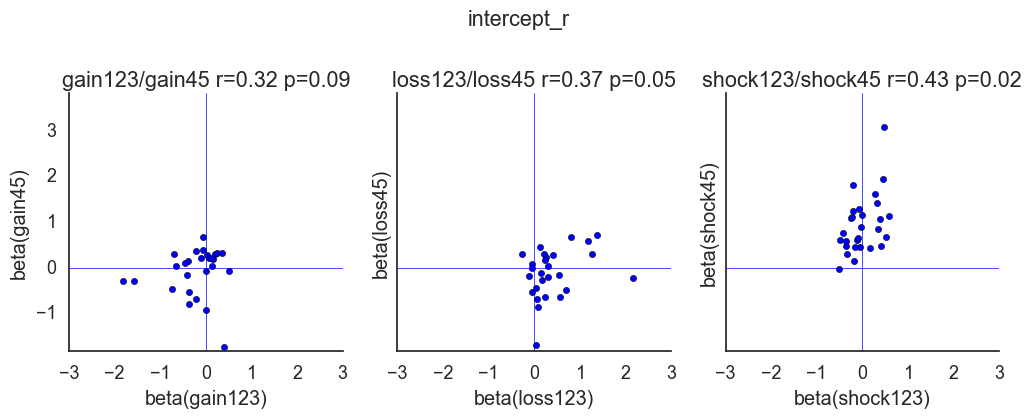

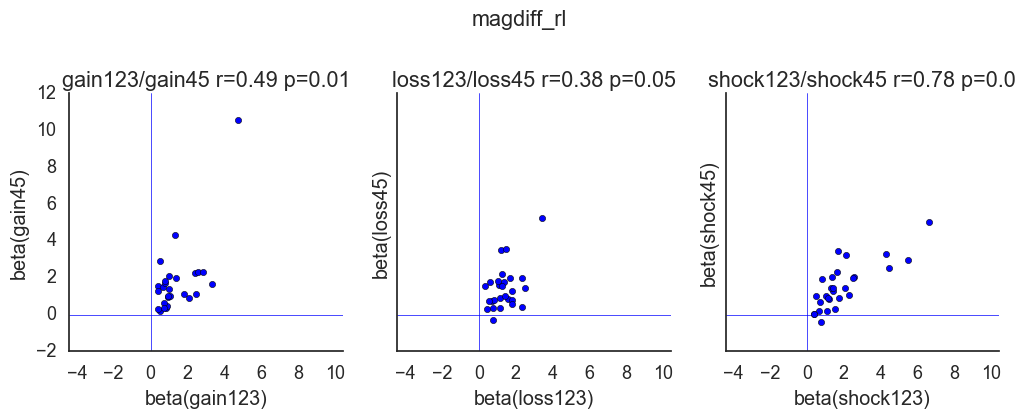

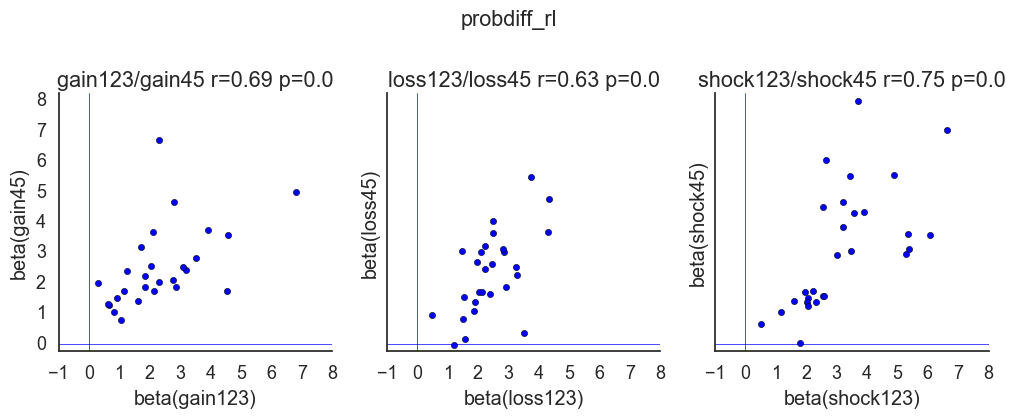

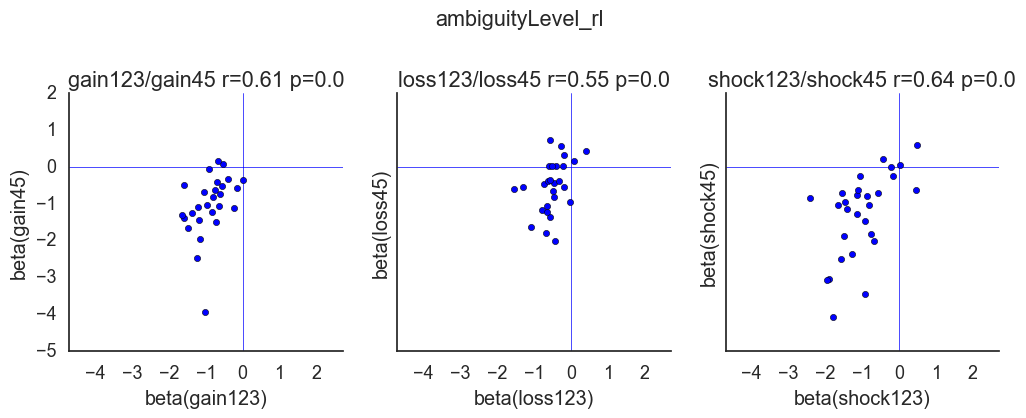

In [31]:
plotTrialCorrelations(triplet_intercept, 'intercept_r')
plotTrialCorrelations(triplet_magdiff, 'magdiff_rl')
plotTrialCorrelations(triplet_probdiff, 'probdiff_rl')
f = plotTrialCorrelations(triplet_ambiguityLevel, 'ambiguityLevel_rl')



## Bar graphs reorganized

In [33]:
model_param_df_level_first['trials'] = 'early'

In [34]:
model_param_df_level_late['trials'] = 'late'

In [35]:
model = model_param_df_level_first.append(model_param_df_level_late)

In [36]:
Gain = model.loc[(model['task'] == 'gain')]
Loss = model.loc[(model['task'] == 'loss')]
Shock = model.loc[(model['task'] == 'shock')]

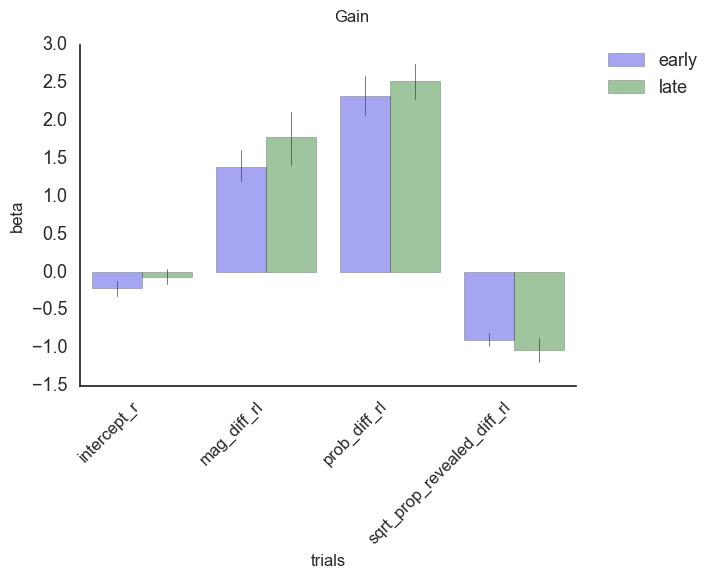

In [37]:
f = plot_params_rl(Gain, Task = 'Gain')


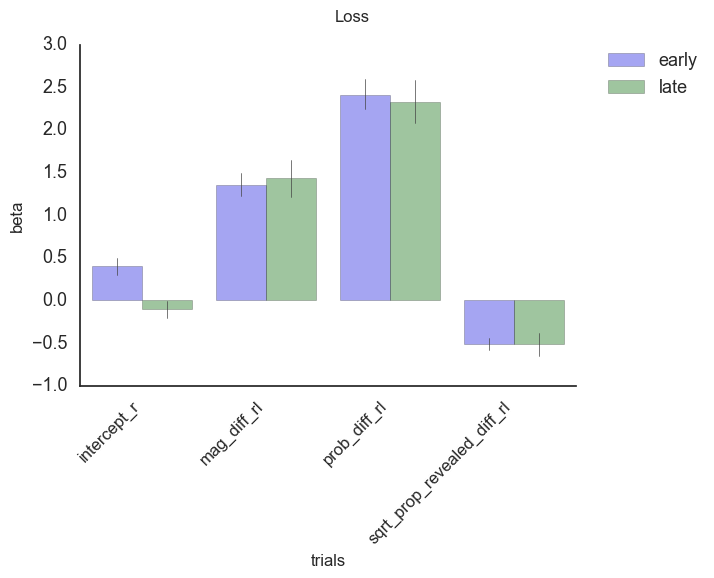

In [38]:
f = plot_params_rl(Loss, Task = 'Loss')


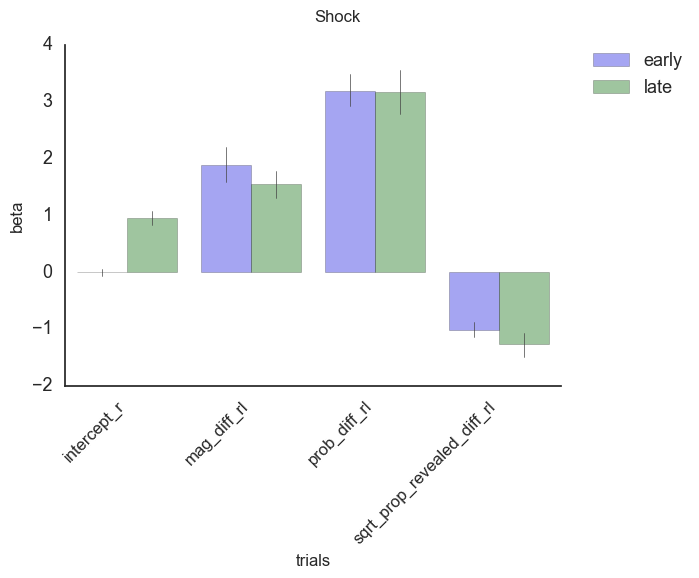

In [39]:
f = plot_params_rl(Shock, Task = 'Shock')